In [3]:
import numpy as np
import matplotlib.pyplot as plt

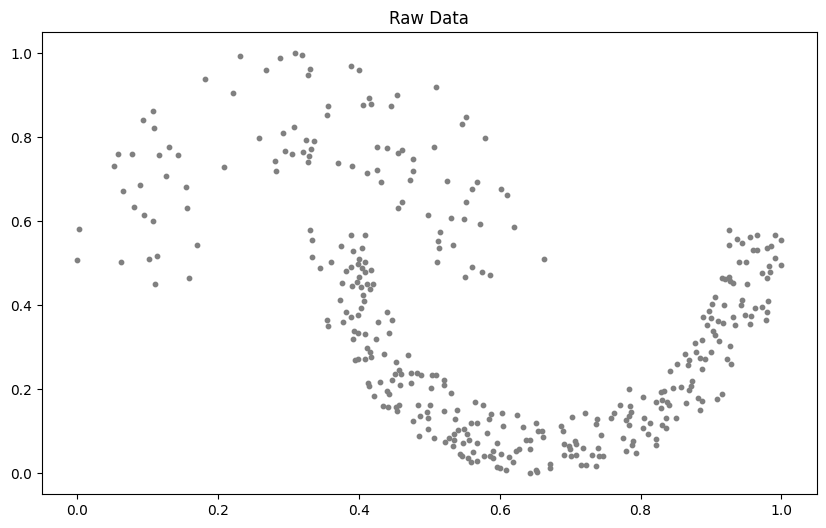

In [5]:
X = np.loadtxt('dataset.txt')

#raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, color='grey')
plt.title('Raw Data')
plt.show()

In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def initialize_centroids(points, k):
    return points[np.random.choice(points.shape[0], k, replace=False)]

In [7]:
def assign_clusters(points, centroids):
    clusters = np.zeros(len(points), dtype=int)
    for i, point in enumerate(points):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(points, clusters, k):
    centroids = np.zeros((k, points.shape[1]))
    for i in range(k):
        cluster_points = points[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def calculate_inertia(points, clusters, centroids):
    return sum(np.min(np.sum((points - centroids[:, np.newaxis])**2, axis=2), axis=0))

def kmeans(points, k, max_iterations=100):
    centroids = initialize_centroids(points, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(points, centroids)
        new_centroids = update_centroids(points, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids, calculate_inertia(points, clusters, centroids)

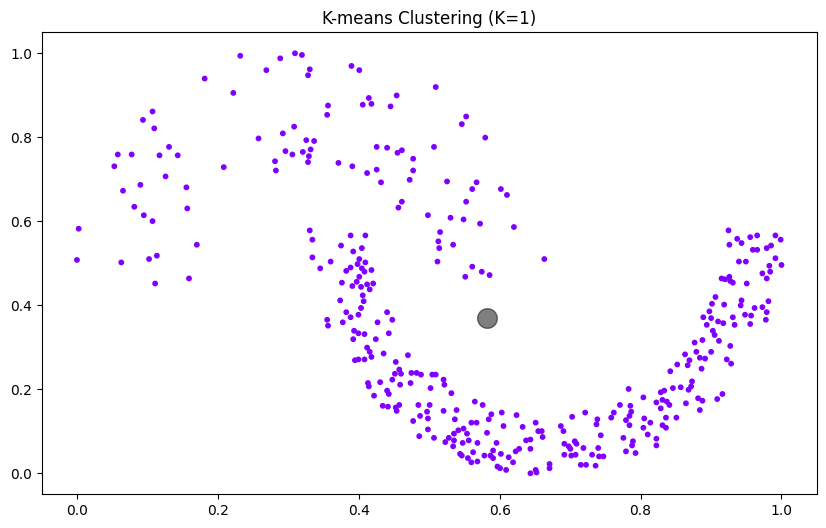

K=1, Inertia=48.14315359899363


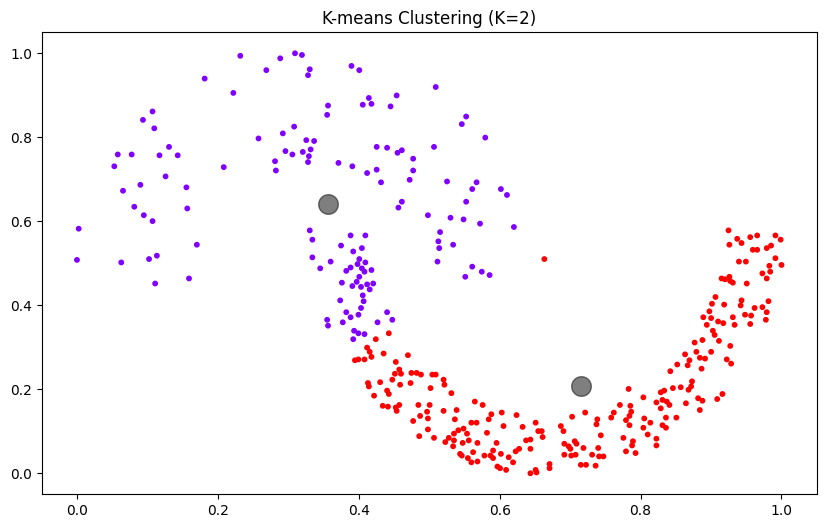

K=2, Inertia=20.573931553095605


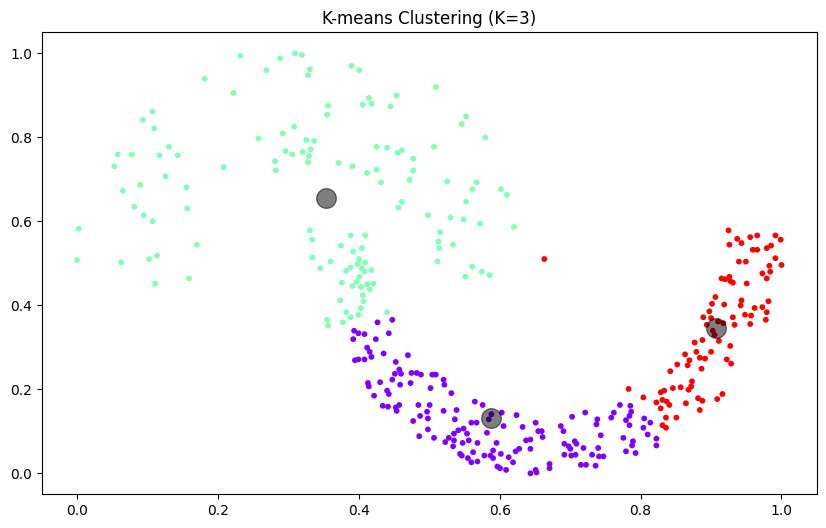

K=3, Inertia=12.319008901291538


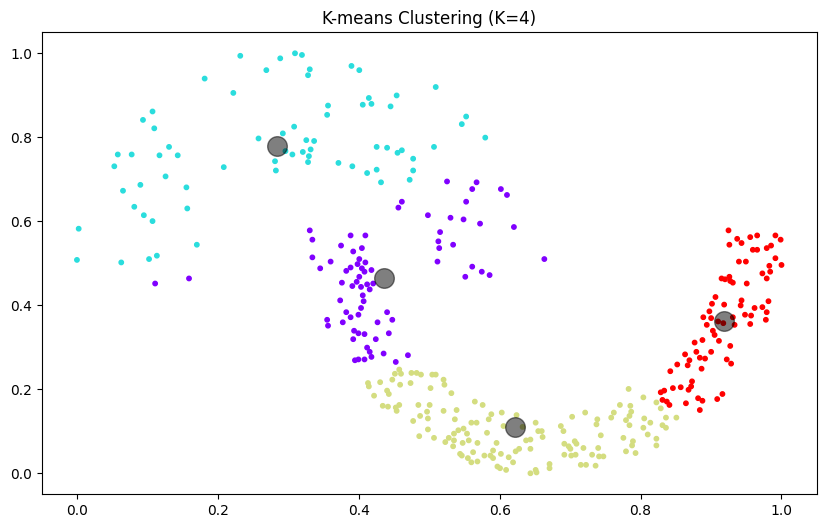

K=4, Inertia=8.497119996248973


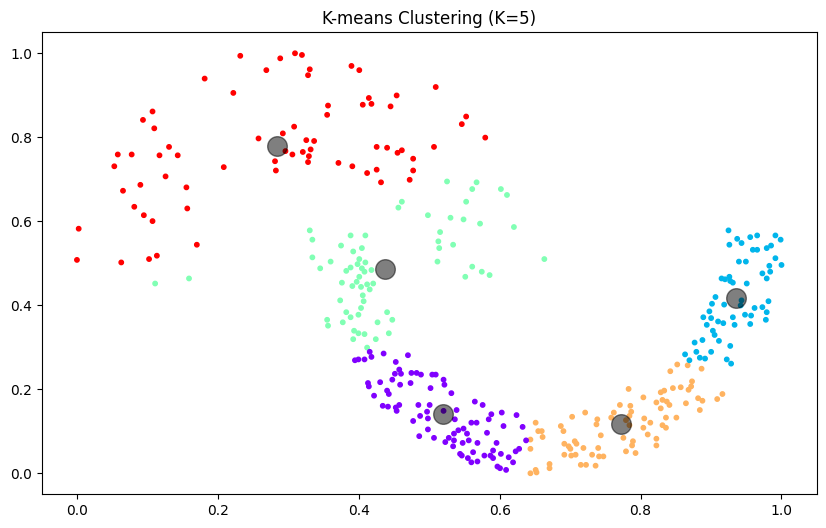

K=5, Inertia=6.412729336695482


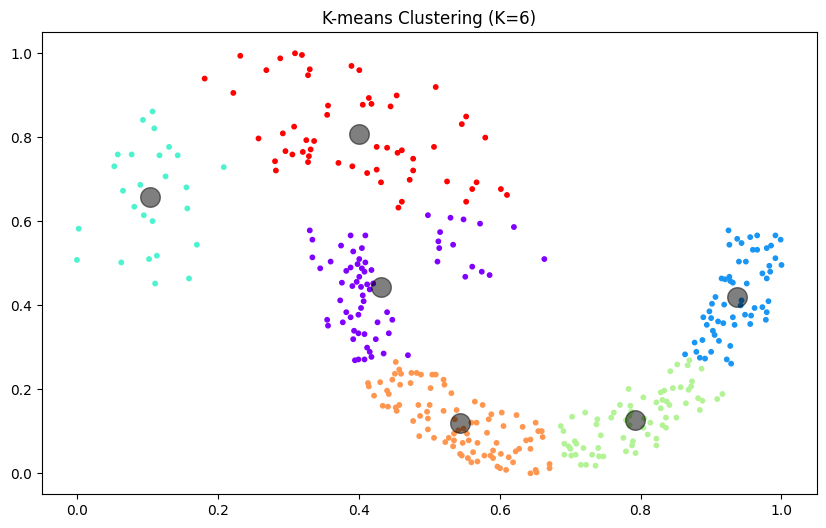

K=6, Inertia=4.69485168405954


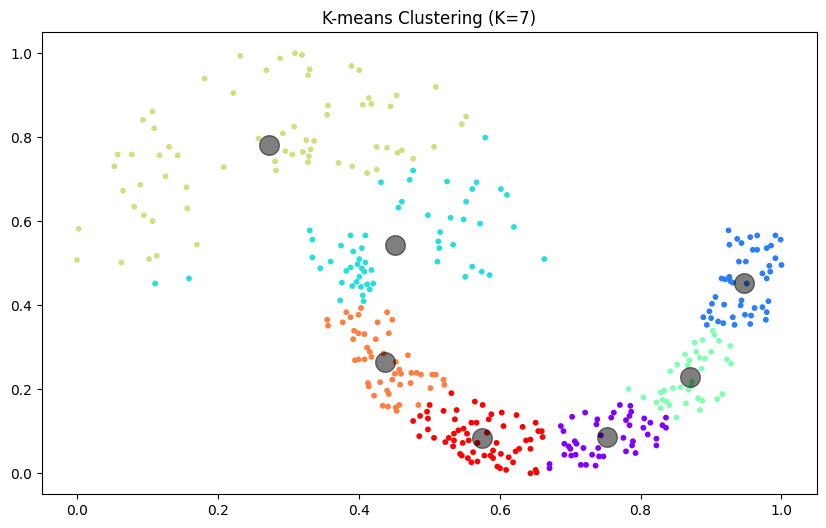

K=7, Inertia=4.891760586282874


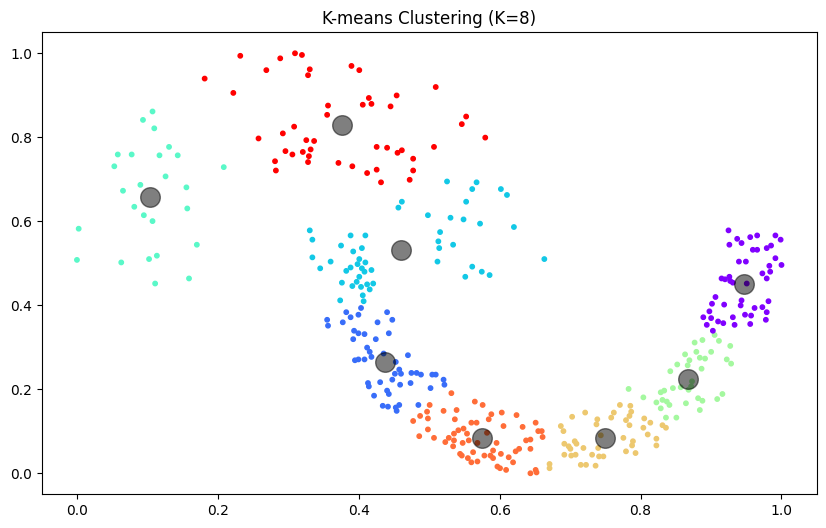

K=8, Inertia=3.206947527626812


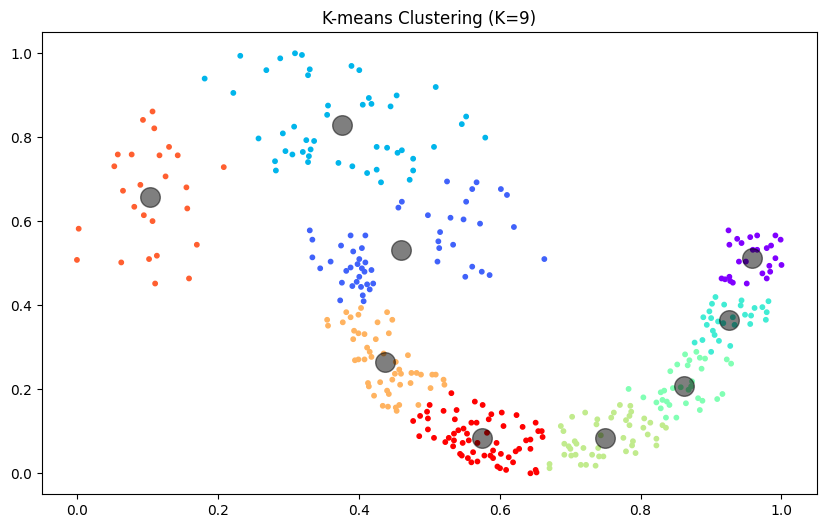

K=9, Inertia=2.956863535858847


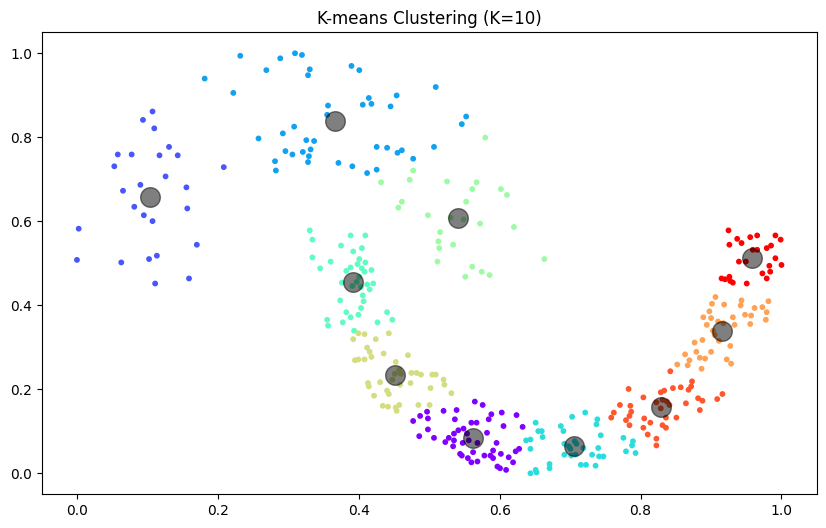

K=10, Inertia=2.392747431812271


In [8]:
# Applying k means for different k values
clustering_score = []
for k in range(1, 11):
    clusters, centroids, inertia = kmeans(X, k)
    clustering_score.append(inertia)

    # plotting clustered data for each K
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=10, cmap='rainbow')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
    plt.title(f'K-means Clustering (K={k})')
    plt.show()

    print(f"K={k}, Inertia={inertia}")

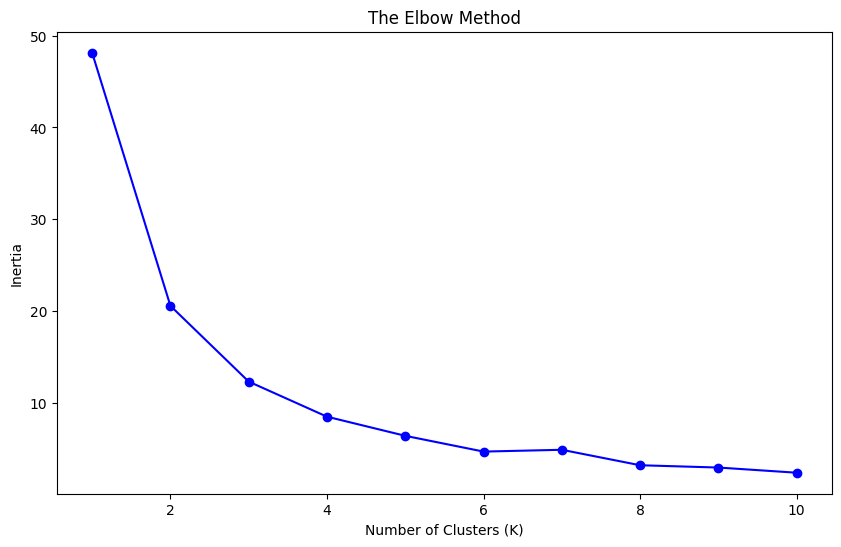

The elbow point suggests that K=1 is a suitable number of clusters.


In [9]:
# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clustering_score, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Determine the elbow point
elbow_point = np.argmin(np.diff(clustering_score)) + 1
print(f"The elbow point suggests that K={elbow_point} is a suitable number of clusters.")